#Prediction of Covid_19 cases in Future

In [447]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [448]:
#Importing Packages
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as pp
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import math
import time
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime

%matplotlib inline

In [449]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



#read the data and store data titled time_series_covid19_confirmed_global.csv
covid_19_trend = ('/content/drive/My Drive/Stomble_Task/time_series_covid19_confirmed_global.csv')
confirmed_cases_df = pd.read_csv(covid_19_trend) 
confirmed_cases_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/01/2020,2/02/2020,2/03/2020,2/04/2020,2/05/2020,2/06/2020,2/07/2020,2/08/2020,2/09/2020,2/10/2020,2/11/2020,2/12/2020,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,1/09/2021,1/10/2021,1/11/2021,1/12/2021,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/01/2021,2/02/2021,2/03/2021,2/04/2021,2/05/2021,2/06/2021,2/07/2021,2/08/2021,2/09/2021,2/10/2021,2/11/2021,2/12/2021,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,53400,53489,53538,53584,53584,53775,53831,53938,53984,54062,54141,54278,54403,54483,54559,54595,54672,54750,54854,54891,54939,55008,55023,55059,55121,55174,55231,55265,55330,55335,55359,55384,55402,55420,55445,55473,55492,55514,55518,55540
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,63033,63595,63971,64627,65334,65994,66635,67216,67690,67982,68568,69238,69916,70655,71441,72274,72812,73691,74567,75454,76350,77251,78127,78992,79934,80941,81993,83082,84212,85336,86289,87528,88671,89776,90835,91987,93075,93850,94651,95726
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,101913,102144,102369,102641,102860,103127,103381,103611,103833,104092,104341,104606,104852,105124,105369,105596,105854,106097,106359,106610,106887,107122,107339,107578,107841,108116,108381,108629,108629,109088,109313,109559,109782,110049,110303,110513,110711,110894,111069,111247
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8586,8586,8586,8682,8818,8868,8946,9038,9083,9083,9194,9308,9379,9416,9499,9549,9596,9638,9716,9779,9837,9885,9937,9972,10017,10070,10137,10172,10206,10251,10275,10312,10352,10391,10427,10463,10503,10538,10555,10583
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,18156,18193,18254,18343,18425,18613,18679,18765,18875,18926,19011,19093,19177,19269,19367,19399,19476,19553,19580,19672,19723,19782,19796,19829,19900,19937,19996,20030,20062,20086,20112,20163,20210,20261,20294,20329,20366,20381,20389,20400


In [450]:
#shape of the data
confirmed_cases_df.shape


(273, 397)

In [451]:
#describinh the data
confirmed_cases_df.describe

<bound method NDFrame.describe of     Province/State      Country/Region        Lat  ...  2/15/21  2/16/21  2/17/21
0              NaN         Afghanistan  33.939110  ...    55514    55518    55540
1              NaN             Albania  41.153300  ...    93850    94651    95726
2              NaN             Algeria  28.033900  ...   110894   111069   111247
3              NaN             Andorra  42.506300  ...    10538    10555    10583
4              NaN              Angola -11.202700  ...    20381    20389    20400
..             ...                 ...        ...  ...      ...      ...      ...
268            NaN             Vietnam  14.058324  ...     2269     2311     2329
269            NaN  West Bank and Gaza  31.952200  ...   168444   169487   170527
270            NaN               Yemen  15.552727  ...     2145     2148     2151
271            NaN              Zambia -13.133897  ...    70248    70823    71677
272            NaN            Zimbabwe -19.015438  ...    35222 



```

```

## Data Visualization of Number of Cases-Covid-19 in World-wide

## Data PreProcessing

In [452]:
confirmed_cases_df.rename(columns={"Province/State": "Province_State", "Country/Region": "Country_Region"}, inplace=True)

In [453]:
#changing the dataframe format from wide to long using melt() function
confirmed_cases_melt_df = pd.melt(confirmed_cases_df, id_vars=['Province_State', 'Country_Region', 'Lat', 'Long'],
                          var_name = 'Date',
                          value_name = 'Confirmed_cases')
confirmed_cases_melt_df

,Province_State,Country_Region,Lat,Long,Date,Confirmed_cases
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
107284,NaN,Vietnam,14.058324,108.277199,2/17/21,2329
107285,NaN,West Bank and Gaza,31.952200,35.233200,2/17/21,170527
107286,NaN,Yemen,15.552727,48.516388,2/17/21,2151
107287,NaN,Zambia,-13.133897,27.849332,2/17/21,71677


In [454]:
#shape of the changed format
confirmed_cases_melt_df.shape


(107289, 6)

In [455]:
confirmed_cases_melt_df.index

RangeIndex(start=0, stop=107289, step=1)

In [456]:
#checking for missing values
confirmed_cases_melt_df.isnull().sum()

Province_State     74277
Country_Region         0
Lat                  393
Long                 393
Date                   0
Confirmed_cases        0
dtype: int64

In [457]:
#dsiplaying the columns in the dataset
confirmed_cases_melt_df.columns

Index(['Province_State', 'Country_Region', 'Lat', 'Long', 'Date',
       'Confirmed_cases'],
      dtype='object')

In [458]:
#Dropping the Repatriated Travellers as there is a missing values for Lat and Long
confirmed_cases_melt_df.dropna(axis=0, subset=['Lat'])
confirmed_cases_melt_df.dropna(axis=0, subset=['Long'])
confirmed_cases_melt_df

,Province_State,Country_Region,Lat,Long,Date,Confirmed_cases
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
107284,NaN,Vietnam,14.058324,108.277199,2/17/21,2329
107285,NaN,West Bank and Gaza,31.952200,35.233200,2/17/21,170527
107286,NaN,Yemen,15.552727,48.516388,2/17/21,2151
107287,NaN,Zambia,-13.133897,27.849332,2/17/21,71677


In [477]:
%pip install geopandas

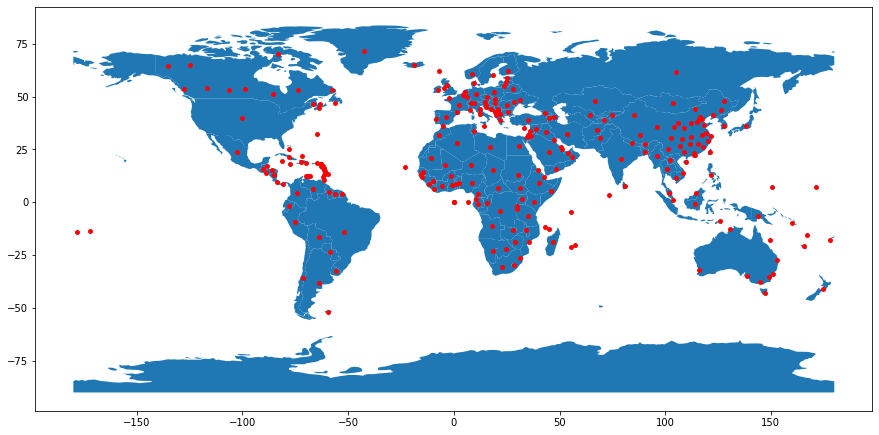

In [478]:
#Data Visualization of Number of Cases world-wide 
import seaborn as sns
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(confirmed_cases_df['Long'], confirmed_cases_df['Lat'])]
gdf = GeoDataFrame(confirmed_cases_df[['Lat','Long']], geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(15, 10)), marker='o', color='red', markersize=15);

### Number of samples per country in our data

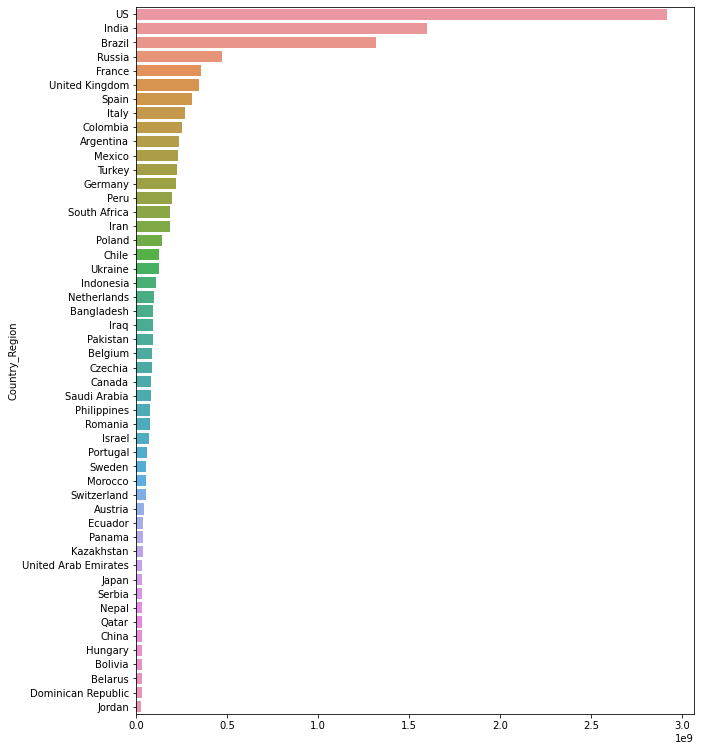

In [460]:
# Top 50 Country wise Confirmed cases acc to given data

fig, ax = plt.subplots(figsize=(10, 13))
sns.barplot(y=top_10.index[:50], x=top_10.values[:50])

**According to the bar graph, the graph shows a clear visualization of the Top 50 Country wise Confirmed cases from to given data. United States, India, Brazil are the top 3 highest number of covid-19 cases whereas, Belarus, Dominican Republic and Jordan has least number of covid-19 cases reported.**

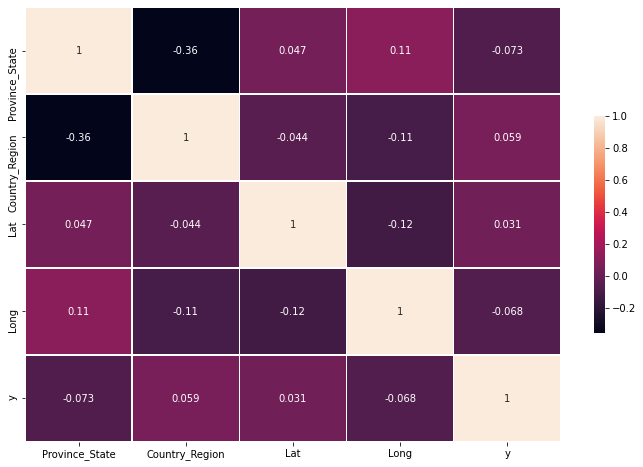

In [470]:
#heat maps to generate correlation matrix of the confirmed cases for the covid-19
fig, ax = plt.subplots(figsize=(12, 8))
corr = confirmed_cases_melt_df.corr()
sns.heatmap(corr, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

**According the coorelation matrix, there is a dependence of the variables from the dataset. According to the dataset, there is a dependence of Latitude and Country/Region variables which are to the important factors to be considered to predcit the number of covid-19 cases.**

In [462]:

#typecasting the categorical features to a category dtype
confirmed_cases_melt_df['Province_State'] = confirmed_cases_melt_df['Province_State'].astype('category').cat.codes
confirmed_cases_melt_df['Country_Region'] = confirmed_cases_melt_df['Country_Region'].astype('category').cat.codes

print(confirmed_cases_melt_df.dtypes)

Province_State        int8
Country_Region       int16
Lat                float64
Long               float64
Date                object
Confirmed_cases      int64
dtype: object


##Prediction of Number of Covid-19 cases from March 2021 to December 20201

In [463]:
confirmed_cases_melt_df.head()


,Province_State,Country_Region,Lat,Long,Date,Confirmed_cases
0,-1,0,33.93911,67.709953,1/22/20,0
1,-1,1,41.15330,20.168300,1/22/20,0
2,-1,2,28.03390,1.659600,1/22/20,0
3,-1,3,42.50630,1.521800,1/22/20,0
4,-1,4,-11.20270,17.873900,1/22/20,0


In [464]:
confirmed_cases_melt_df.columns = ['Province_State','Country_Region','Lat','Long','ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed_cases_melt_df['ds'] = pd.to_datetime(confirmed_cases_melt_df['ds'])

In [465]:
confirmed_cases_melt_df.head()

,Province_State,Country_Region,Lat,Long,ds,y
0,-1,0,33.93911,67.709953,2020-01-22,0
1,-1,1,41.15330,20.168300,2020-01-22,0
2,-1,2,28.03390,1.659600,2020-01-22,0
3,-1,3,42.50630,1.521800,2020-01-22,0
4,-1,4,-11.20270,17.873900,2020-01-22,0


##Forecasting Number of Covid-19 Cases

In [466]:
days_to_forecast = 1 # changable
first_forecasted_date = sorted(list(set(confirmed_cases_melt_df['ds'].values)))[-days_to_forecast]

print('The first date to perform forecasts for is: ' + str(first_forecasted_date))

The first date to perform forecasts for is: 2021-02-17T00:00:00.000000000


In [476]:
from fbprophet import Prophet

m = Prophet(daily_seasonality=False, weekly_seasonality=False, yearly_seasonality=False)
#m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
m.fit(confirmed_cases_melt_df)
future = m.make_future_dataframe(periods=5, freq = 'M')
future_confirmed = future.copy() # for non-baseline predictions later on
future.tail()


,ds
393,2021-02-28
394,2021-03-31
395,2021-04-30
396,2021-05-31
397,2021-06-30


In [472]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
393,2021-02-28,439585.453928,-557560.530381,1.567822e+06
394,2021-03-31,510772.113537,-539796.933925,1.602321e+06
395,2021-04-30,579662.429289,-465614.676392,1.598058e+06
396,2021-05-31,650849.088898,-433578.026233,1.740928e+06
397,2021-06-30,719739.404649,-277460.831052,1.729807e+06


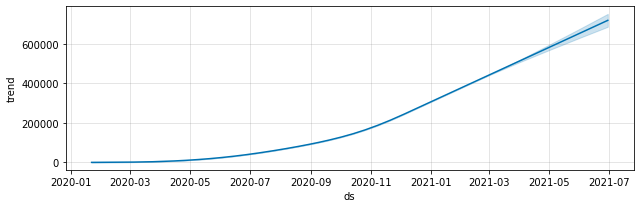

In [473]:
#plotting the prediction graph
forecast_components = m.plot_components(forecast)

**From the forecast component plots, it is clear that, there is an upward trend from May 2020 which is expontentially increasing, especially in the month of July. Hence, according to the prediction of the covid-19 dataset, there are chances of increasing number of cases in future.**


